# 03: Geoprocessing


## imports


In [ ]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import geopandas as gpd
from lonboard._map import Map
from lonboard._layer import PolygonLayer
from lonboard.colormap import apply_categorical_cmap

# done
# spatial join
# buildings to tax lots
# buildings in 3d with lonboard
# dissolve tax lot by lu or by owner
# calculate soft site potential based on FAR, lot size, building class

# not done
# union tax lots and sidewalk to get blocks in total
# intersect to show non-building area

In [104]:
# global map plot settings
plt.rcParams["figure.figsize"] = (10, 10)


# We are doing a lot of plotting, and at the scale we're working, we don't need to see coordinates on the axes.
# We can turn off the axes and ticks by default to keep the plots clean.
# Instead of running this cell, you could add `set_axis_off()` to each plot you create.


def set_axis_off():
    """
    Set the default matplotlib settings to turn off axes and ticks.
    This function modifies the global matplotlib configuration to hide axes and ticks
    for all plots created after this function is called.
    """
    # set axis off by default
    plt.rcParams["axes.axisbelow"] = False
    plt.rcParams["axes.axisbelow"] = False
    plt.rcParams["axes.spines.left"] = False
    plt.rcParams["axes.spines.right"] = False
    plt.rcParams["axes.spines.top"] = False
    plt.rcParams["axes.spines.bottom"] = False

    # set tick params off by default
    plt.rcParams["xtick.bottom"] = False
    plt.rcParams["xtick.top"] = False
    plt.rcParams["xtick.labelbottom"] = False
    plt.rcParams["xtick.labeltop"] = False
    plt.rcParams["ytick.left"] = False
    plt.rcParams["ytick.right"] = False
    plt.rcParams["ytick.labelleft"] = False
    plt.rcParams["ytick.labelright"] = False

In [105]:
set_axis_off()

In [3]:
cb_307 = gpd.read_file(
    "../Data/nyc_mappluto_24v1_1_shp/mappluto_ogr.fgb", where="CD = 307"
)

In [4]:
cb_307.LandUse.value_counts()

LandUse
One & Two Family Buildings                  6299
Multi-Family Walk-Up Buildings              3731
Mixed Residential & Commercial Buildings    1635
Industrial & Manufacturing                   603
Commercial & Office Buildings                247
Vacant Land                                  165
Public Facilities & Institutions             164
Transportation & Utility                     137
Parking Facilities                           123
Multi-Family Elevator Buildings               90
Unknown                                       49
Open Space & Outdoor Recreation               41
Name: count, dtype: int64

<Axes: >

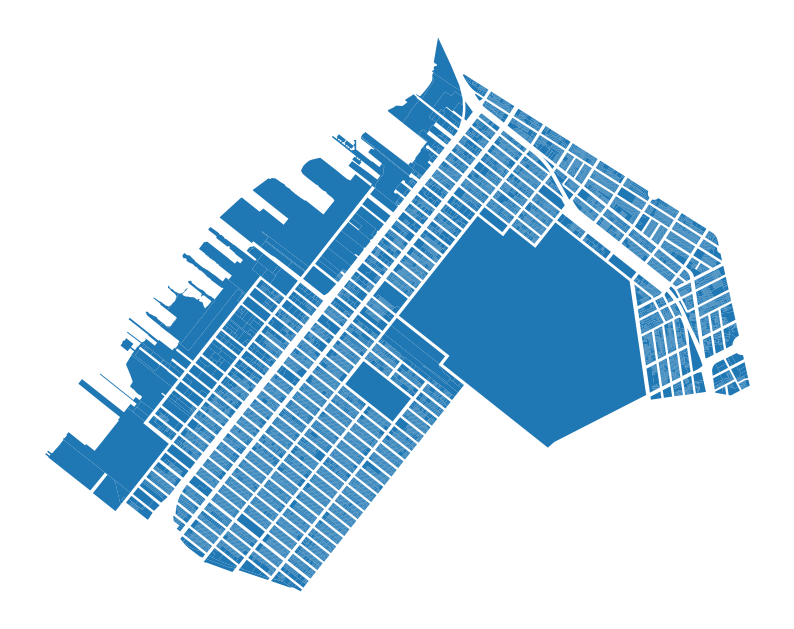

In [5]:
cb_307.plot()

In [6]:
# get maximum bounding geometry for all tax lots
bounds = cb_307.total_bounds

In [7]:
bounds

array([975222.90192556, 170552.42205763, 992130.25818682, 183853.30228138])

In [8]:
bounds_poly = gpd.GeoSeries(
    Polygon(
        [
            [bounds[0], bounds[1]],
            [bounds[0], bounds[3]],
            [bounds[2], bounds[3]],
            [bounds[2], bounds[1]],
            [bounds[0], bounds[1]],
        ]
    )
)

In [9]:
bounds_poly

0    POLYGON ((975222.902 170552.422, 975222.902 18...
dtype: geometry

<Axes: >

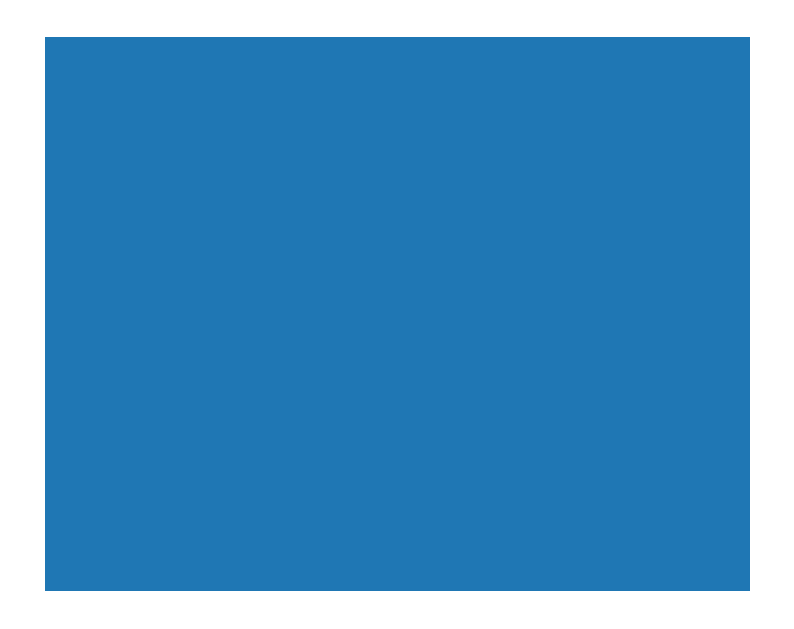

In [10]:
bounds_poly.plot()

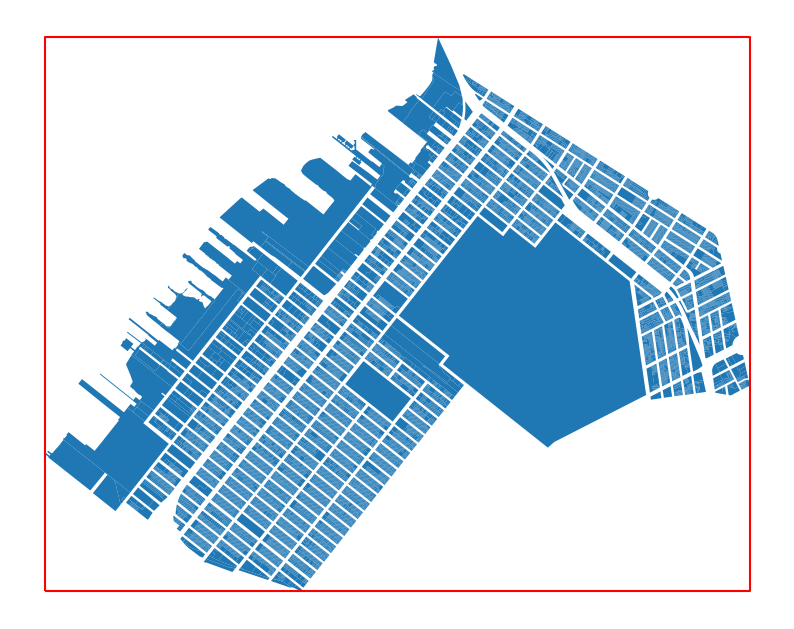

In [ ]:
ax = cb_307.plot()
bounds_poly.boundary.plot(ax=ax, color="red")

In [12]:
bounds_poly

0    POLYGON ((975222.902 170552.422, 975222.902 18...
dtype: geometry

In [13]:
cb_307.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US survey foot)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [14]:
bounds_poly.crs

In [15]:
bounds_poly.crs = cb_307.crs

In [16]:
bounds_poly.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US survey foot)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

## reproject


In [17]:
bounds_poly_wgs84 = bounds_poly.to_crs("EPSG:4326")

<Axes: >

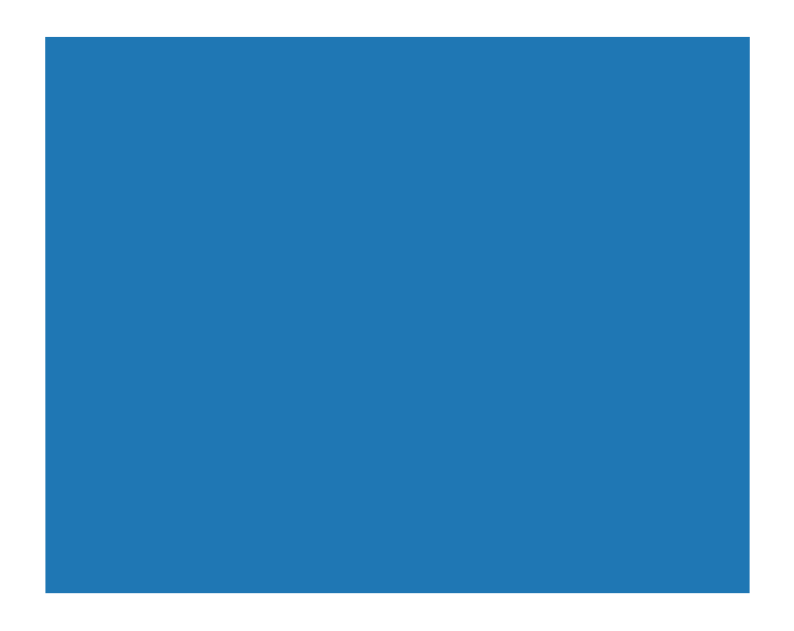

In [18]:
bounds_poly_wgs84.plot()

In [19]:
cb_307_bldgs = gpd.read_file(
    "../Data/bldg_footprints/Building Footprints.geojson",
    mask=bounds_poly_wgs84[0],
)

<Axes: >

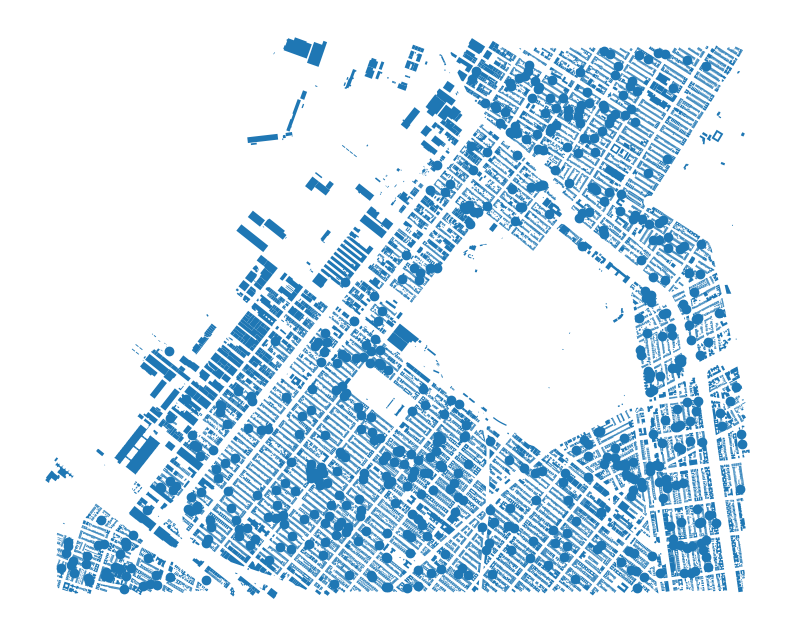

In [20]:
cb_307_bldgs.plot()

In [21]:
cb_307_bldgs = cb_307_bldgs[cb_307_bldgs.geometry.type != "Point"]

<Axes: >

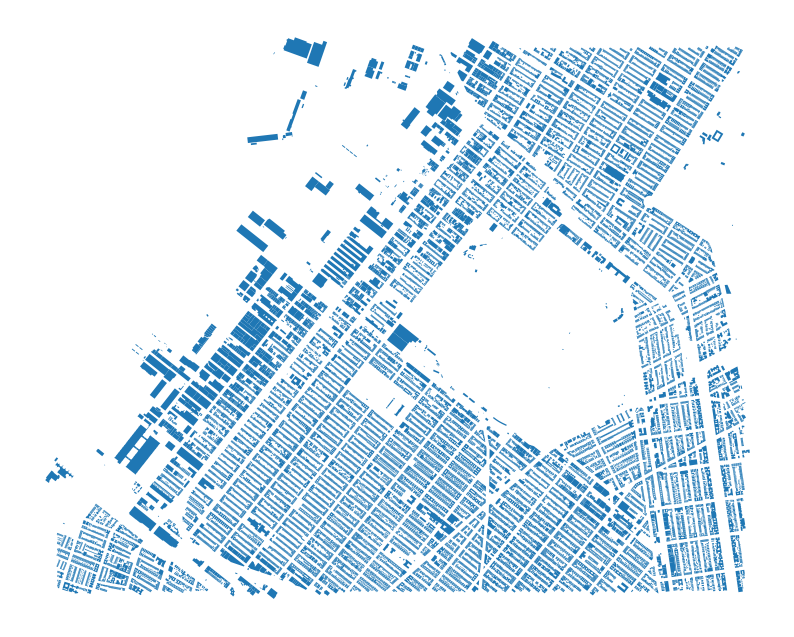

In [22]:
cb_307_bldgs.plot()

In [23]:
cb_307_bldgs = cb_307_bldgs.to_crs(cb_307.crs)

<Axes: >

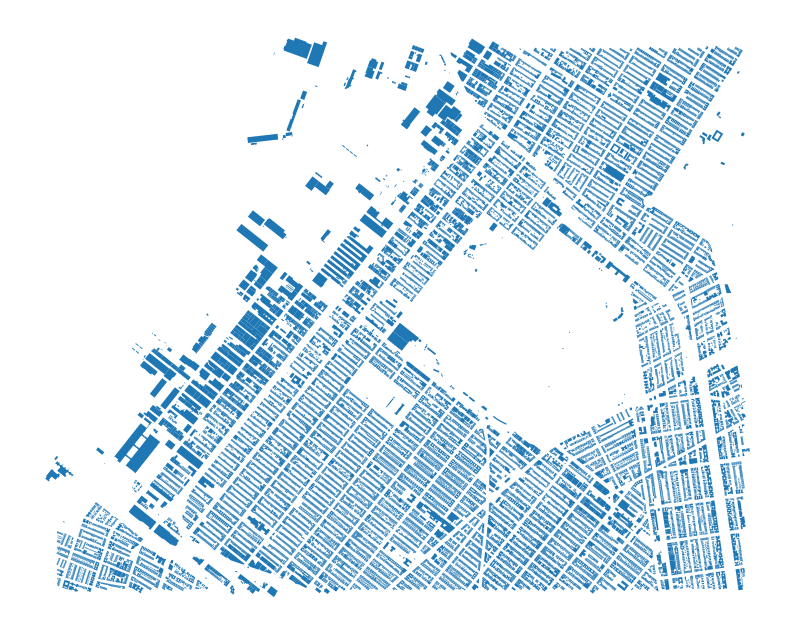

In [24]:
cb_307_bldgs.plot()

## spatial join


<Axes: >

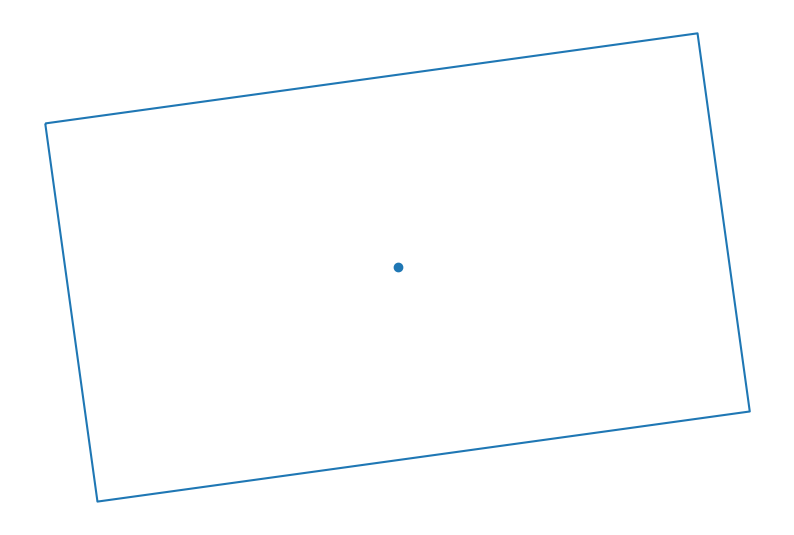

In [25]:
ss = cb_307_bldgs.sample()

ax = ss.boundary.plot()
ss.representative_point().plot(ax=ax)

In [26]:
cb_307_bldgs["rep_pt"] = cb_307_bldgs.representative_point()
cb_307_bldgs.set_geometry("rep_pt", inplace=True)

In [27]:
cb_307_bldgs

name    base_bbl shape_area   heightroof  mpluto_bbl cnstrct_yr  \
0      None  3008130054        0.0        31.05  3008130054       1901   
1      None  3010120038        0.0        42.44  3010120038       1921   
2      None  3053130127        0.0  26.38239517  3053130127       1940   
3      None  3058710090        0.0        24.71  3058710090       1920   
4      None  3058850095        0.0        26.79  3058850095       1925   
...     ...         ...        ...          ...         ...        ...   
30108  None  3007280070        0.0  32.32698744  3007280070       2024   
30109  None  3007280071        0.0  32.32698744  3007280071       2024   
30110  None  3056280026        0.0    62.045557  3056280026       2024   
30111  None  3008290016        0.0         50.0  3008290016       2023   
30112  None  3055910116        0.0         60.0  3055917507       2008   

                                     globalid   lststatype feat_code  \
0      {C2B6150A-AA05-4865-B836-9DFA5C153E9C}  Constructed      2100   
1      {65E24ABD-485B-4B01-B70E-5ACA0E221B53}  Constructed      2100   
2      {454D03AE-5F41-4886-A5C5-74DD122005EF}  Constructed      2100   
3      {F02017F9-C56E-4793-96D1-03741F2569AC}  Constructed      2100   
4      {D97E7A81-466F-47F7-9159-D52052EC7129}  Constructed      2100   
...                                       ...          ...       ...   
30108  {7B705FF4-ACD6-45CD-A2E0-C32B7F74C263}  Constructed      2100   
30109  {75A668C9-C3C1-4D26-A670-0BD6A433B4BB}  Constructed      2100   
30110  {BFFCEC04-59C1-42BF-97DD-F15B73596D1A}  Constructed      2100   
30111  {A2C9A5C4-FDE4-4561-911C-635B8593DC2B}  Constructed      2100   
30112  {F565CBEB-73A0-4C8B-8ACF-D7E26DEDFB03}  Constructed      2100   

      groundelev  geomsource      bin lstmoddate doitt_id shape_len  \
0             48  Photogramm  3014166 2017-08-22   392052       0.0   
1            115  Photogramm  3022371 2017-08-22   743038       0.0   
2             57  Photogramm  3123939 2017-08-22   785686       0.0   
3             73  Photogramm  3145644 2017-08-22   560761       0.0   
4             68  Photogramm  3146300 2017-08-22   541427       0.0   
...          ...         ...      ...        ...      ...       ...   
30108         39  Photogramm  3424568 2024-05-06  1302014       0.0   
30109         39  Photogramm  3424569 2024-05-06  1302015       0.0   
30110         56  Photogramm  3429745 2024-05-06  1302016       0.0   
30111         41  Other (Man  3428542 2024-05-06  1300421       0.0   
30112         74  Other (Man  3394074 2024-05-22  1100472       0.0   

                                                geometry  \
0      MULTIPOLYGON (((979424.884 174653.762, 979393....   
1      MULTIPOLYGON (((989250.122 182249.393, 989226....   
2      MULTIPOLYGON (((989342.25 173309.206, 989328.4...   
3      MULTIPOLYGON (((976372.261 170905.43, 976404.2...   
4      MULTIPOLYGON (((975991.817 170852.23, 975985.9...   
...                                                  ...   
30108  MULTIPOLYGON (((981341.775 176474.519, 981329....   
30109  MULTIPOLYGON (((981352.745 176488.37, 981341.7...   
30110  MULTIPOLYGON (((986534.944 171176.81, 986476.8...   
30111  MULTIPOLYGON (((978919.968 174549.012, 978952....   
30112  MULTIPOLYGON (((986063.897 173535.911, 986025....   

                              rep_pt  
0        POINT (979402.531 174638.9)  
1       POINT (989230.47 182235.219)  
2        POINT (989345.27 173325.92)  
3      POINT (976382.124 170892.831)  
4      POINT (975969.477 170848.875)  
...                              ...  
30108  POINT (981321.248 176478.339)  
30109  POINT (981333.527 176493.843)  
30110  POINT (986498.863 171161.133)  
30111  POINT (978917.743 174512.745)  
30112  POINT (986034.911 173520.284)  

[30113 rows x 17 columns]

In [28]:
cb_307_bldgs.shape[0]

30113

In [29]:
cb_307_bldgs.base_bbl.nunique(), cb_307_bldgs.shape[0], cb_307_bldgs.globalid.nunique()

(26357, 30113, 30113)

In [30]:
cb_307_bldgs

name    base_bbl shape_area   heightroof  mpluto_bbl cnstrct_yr  \
0      None  3008130054        0.0        31.05  3008130054       1901   
1      None  3010120038        0.0        42.44  3010120038       1921   
2      None  3053130127        0.0  26.38239517  3053130127       1940   
3      None  3058710090        0.0        24.71  3058710090       1920   
4      None  3058850095        0.0        26.79  3058850095       1925   
...     ...         ...        ...          ...         ...        ...   
30108  None  3007280070        0.0  32.32698744  3007280070       2024   
30109  None  3007280071        0.0  32.32698744  3007280071       2024   
30110  None  3056280026        0.0    62.045557  3056280026       2024   
30111  None  3008290016        0.0         50.0  3008290016       2023   
30112  None  3055910116        0.0         60.0  3055917507       2008   

                                     globalid   lststatype feat_code  \
0      {C2B6150A-AA05-4865-B836-9DFA5C153E9C}  Constructed      2100   
1      {65E24ABD-485B-4B01-B70E-5ACA0E221B53}  Constructed      2100   
2      {454D03AE-5F41-4886-A5C5-74DD122005EF}  Constructed      2100   
3      {F02017F9-C56E-4793-96D1-03741F2569AC}  Constructed      2100   
4      {D97E7A81-466F-47F7-9159-D52052EC7129}  Constructed      2100   
...                                       ...          ...       ...   
30108  {7B705FF4-ACD6-45CD-A2E0-C32B7F74C263}  Constructed      2100   
30109  {75A668C9-C3C1-4D26-A670-0BD6A433B4BB}  Constructed      2100   
30110  {BFFCEC04-59C1-42BF-97DD-F15B73596D1A}  Constructed      2100   
30111  {A2C9A5C4-FDE4-4561-911C-635B8593DC2B}  Constructed      2100   
30112  {F565CBEB-73A0-4C8B-8ACF-D7E26DEDFB03}  Constructed      2100   

      groundelev  geomsource      bin lstmoddate doitt_id shape_len  \
0             48  Photogramm  3014166 2017-08-22   392052       0.0   
1            115  Photogramm  3022371 2017-08-22   743038       0.0   
2             57  Photogramm  3123939 2017-08-22   785686       0.0   
3             73  Photogramm  3145644 2017-08-22   560761       0.0   
4             68  Photogramm  3146300 2017-08-22   541427       0.0   
...          ...         ...      ...        ...      ...       ...   
30108         39  Photogramm  3424568 2024-05-06  1302014       0.0   
30109         39  Photogramm  3424569 2024-05-06  1302015       0.0   
30110         56  Photogramm  3429745 2024-05-06  1302016       0.0   
30111         41  Other (Man  3428542 2024-05-06  1300421       0.0   
30112         74  Other (Man  3394074 2024-05-22  1100472       0.0   

                                                geometry  \
0      MULTIPOLYGON (((979424.884 174653.762, 979393....   
1      MULTIPOLYGON (((989250.122 182249.393, 989226....   
2      MULTIPOLYGON (((989342.25 173309.206, 989328.4...   
3      MULTIPOLYGON (((976372.261 170905.43, 976404.2...   
4      MULTIPOLYGON (((975991.817 170852.23, 975985.9...   
...                                                  ...   
30108  MULTIPOLYGON (((981341.775 176474.519, 981329....   
30109  MULTIPOLYGON (((981352.745 176488.37, 981341.7...   
30110  MULTIPOLYGON (((986534.944 171176.81, 986476.8...   
30111  MULTIPOLYGON (((978919.968 174549.012, 978952....   
30112  MULTIPOLYGON (((986063.897 173535.911, 986025....   

                              rep_pt  
0        POINT (979402.531 174638.9)  
1       POINT (989230.47 182235.219)  
2        POINT (989345.27 173325.92)  
3      POINT (976382.124 170892.831)  
4      POINT (975969.477 170848.875)  
...                              ...  
30108  POINT (981321.248 176478.339)  
30109  POINT (981333.527 176493.843)  
30110  POINT (986498.863 171161.133)  
30111  POINT (978917.743 174512.745)  
30112  POINT (986034.911 173520.284)  

[30113 rows x 17 columns]

In [31]:
cb_307_bldgs[["globalid", "mpluto_bbl", "rep_pt"]]

globalid  mpluto_bbl  \
0      {C2B6150A-AA05-4865-B836-9DFA5C153E9C}  3008130054   
1      {65E24ABD-485B-4B01-B70E-5ACA0E221B53}  3010120038   
2      {454D03AE-5F41-4886-A5C5-74DD122005EF}  3053130127   
3      {F02017F9-C56E-4793-96D1-03741F2569AC}  3058710090   
4      {D97E7A81-466F-47F7-9159-D52052EC7129}  3058850095   
...                                       ...         ...   
30108  {7B705FF4-ACD6-45CD-A2E0-C32B7F74C263}  3007280070   
30109  {75A668C9-C3C1-4D26-A670-0BD6A433B4BB}  3007280071   
30110  {BFFCEC04-59C1-42BF-97DD-F15B73596D1A}  3056280026   
30111  {A2C9A5C4-FDE4-4561-911C-635B8593DC2B}  3008290016   
30112  {F565CBEB-73A0-4C8B-8ACF-D7E26DEDFB03}  3055917507   

                              rep_pt  
0        POINT (979402.531 174638.9)  
1       POINT (989230.47 182235.219)  
2        POINT (989345.27 173325.92)  
3      POINT (976382.124 170892.831)  
4      POINT (975969.477 170848.875)  
...                              ...  
30108  POINT (981321.248 176478.339)  
30109  POINT (981333.527 176493.843)  
30110  POINT (986498.863 171161.133)  
30111  POINT (978917.743 174512.745)  
30112  POINT (986034.911 173520.284)  

[30113 rows x 3 columns]

In [32]:
## spatial join buildings to tax lots based on building representative point
bldgs_w_lot = cb_307_bldgs[["globalid", "mpluto_bbl", "rep_pt"]].sjoin(
    cb_307, how="inner", predicate="within"
)

In [33]:
bldgs_w_lot

globalid  mpluto_bbl  \
0      {C2B6150A-AA05-4865-B836-9DFA5C153E9C}  3008130054   
6      {6290F624-6A8D-482F-8BD9-57C27337D89F}  3008370001   
7      {F68D5818-C246-4828-A454-10D28962217D}  3007890064   
9      {441DAB8C-3423-4722-ABDE-4BFE5A472C2B}  3052800064   
11     {B8BC6B19-B2E4-4842-8B03-5C28CC13A572}  3011150070   
...                                       ...         ...   
30106  {D5768C56-DC0C-4488-900C-B2A3A6D16F0D}  3007280068   
30107  {5621CB64-68C7-45BD-8999-B5A11F49E410}  3007280069   
30108  {7B705FF4-ACD6-45CD-A2E0-C32B7F74C263}  3007280070   
30109  {75A668C9-C3C1-4D26-A670-0BD6A433B4BB}  3007280071   
30111  {A2C9A5C4-FDE4-4561-911C-635B8593DC2B}  3008290016   

                              rep_pt  index_right Borough  Block  Lot   CD  \
0        POINT (979402.531 174638.9)         6880      BK    813   54  307   
6      POINT (978532.245 174359.877)         7179      BK    837    1  307   
7        POINT (979672.912 175444.4)         7747      BK    789   64  307   
9      POINT (989860.229 175412.619)        12324      BK   5280   64  307   
11     POINT (990278.753 178961.422)         1061      BK   1115   70  307   
...                              ...          ...     ...    ...  ...  ...   
30106  POINT (981296.529 176447.127)         8156      BK    728   68  307   
30107   POINT (981309.04 176462.804)         8155      BK    728   69  307   
30108  POINT (981321.248 176478.339)         8154      BK    728   70  307   
30109  POINT (981333.527 176493.843)         8157      BK    728   71  307   
30111  POINT (978917.743 174512.745)         7160      BK    829   16  307   

       BCT2020    BCTCB2020  ... PFIRM15_FL Version DCPEdited   Latitude  \
0      3002000  30020002002  ...       None  24v1.1      None  40.646041   
6      3002200  30022002000  ...       None  24v1.1      None  40.645239   
7      3002000  30020001003  ...       None  24v1.1      None  40.648210   
9      3050001  30500011001  ...       None  24v1.1      None  40.648203   
11     3017100  30171002000  ...       None  24v1.1      None  40.657928   
...        ...          ...  ...        ...     ...       ...        ...   
30106  3008200  30082002003  ...       None  24v1.1      None  40.650969   
30107  3008200  30082002003  ...       None  24v1.1      None  40.651013   
30108  3008200  30082002003  ...       None  24v1.1      None  40.651054   
30109  3008200  30082002003  ...       None  24v1.1      None  40.651100   
30111  3002200  30022001005  ...       None  24v1.1      None  40.645648   

       Longitude Notes  Shape_Leng    Shape_Area  NumFloorsCluster    color  
0     -74.017448  None         0.0   1756.742220                 0  #ff0000  
6     -74.020500  None         0.0  19141.495406                 2  #800000  
7     -74.016515  None         0.0   6152.697688                 0  #ffff00  
9     -73.979830  None         0.0   2138.490866                 0  #ff00ff  
11    -73.978234  None         0.0   2055.187662                 0  #ff0000  
...          ...   ...         ...           ...               ...      ...  
30106 -74.010638  None         0.0   1031.523292                 3  #ff0000  
30107 -74.010592  None         0.0   1034.721967                 3  #ff0000  
30108 -74.010548  None         0.0   1026.353733                 3  #ff0000  
30109 -74.010502  None         0.0   1130.797708                 3  #ff0000  
30111 -74.019232  None         0.0   4065.521634                 2  #ff00ff  

[14315 rows x 100 columns]

In [34]:
bldgs_w_lot_nearest = cb_307_bldgs[["globalid", "mpluto_bbl", "rep_pt"]].sjoin_nearest(
    cb_307, how="left", distance_col="distance"
)

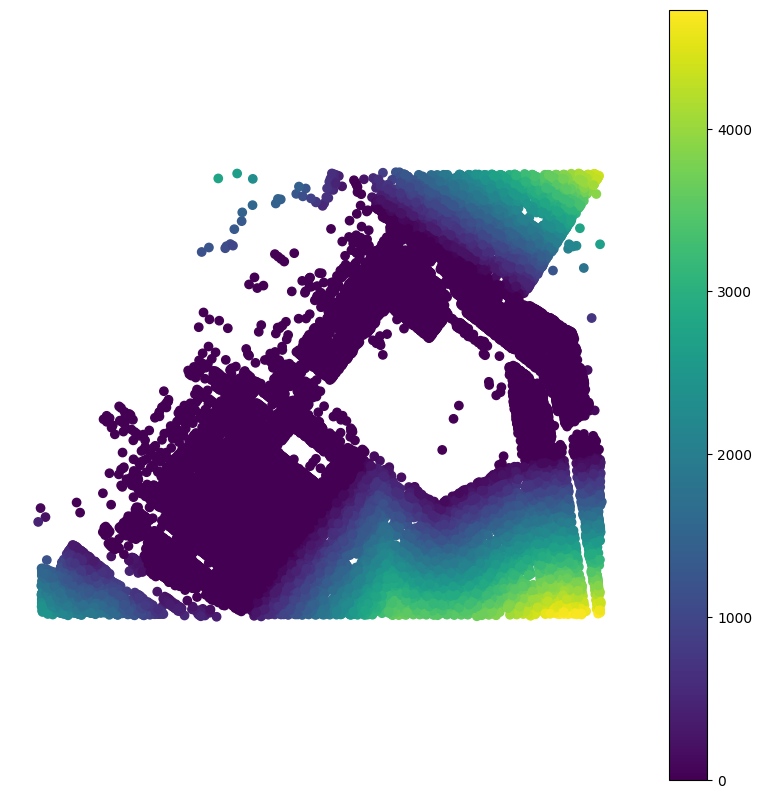

In [ ]:
bldgs_w_lot_nearest.plot("distance", legend=True)

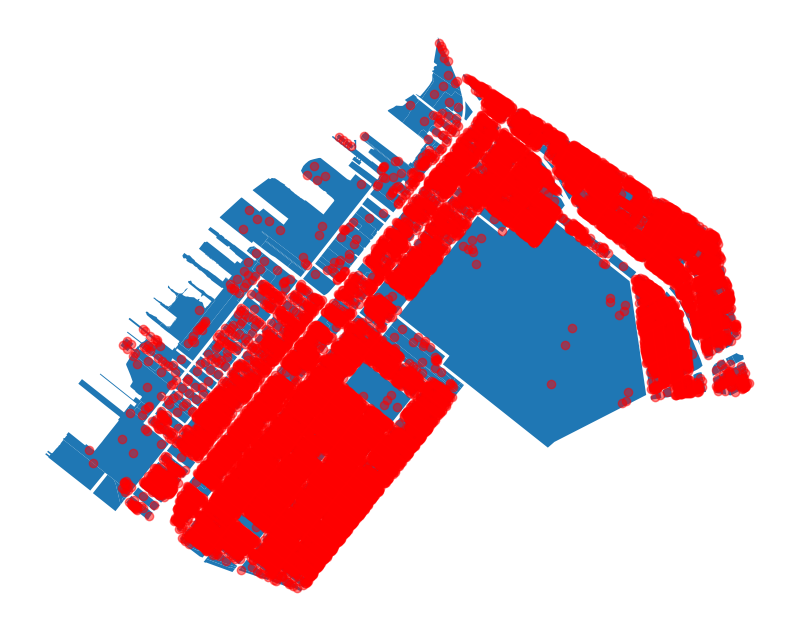

In [ ]:
ax = cb_307.plot()
bldgs_w_lot.plot(ax=ax, color="red", alpha=0.5)

In [37]:
## drop cases where there is no match (i.e. no tax lot for buildings)

In [38]:
# now, join back to original building footprints
bldgs_w_lot = bldgs_w_lot.drop(columns=["rep_pt"]).merge(
    cb_307_bldgs, on="globalid", how="left"
)

In [39]:
type(bldgs_w_lot)

pandas.core.frame.DataFrame

In [40]:
bldgs_w_lot_gdf = gpd.GeoDataFrame(bldgs_w_lot, geometry="geometry")

<Axes: >

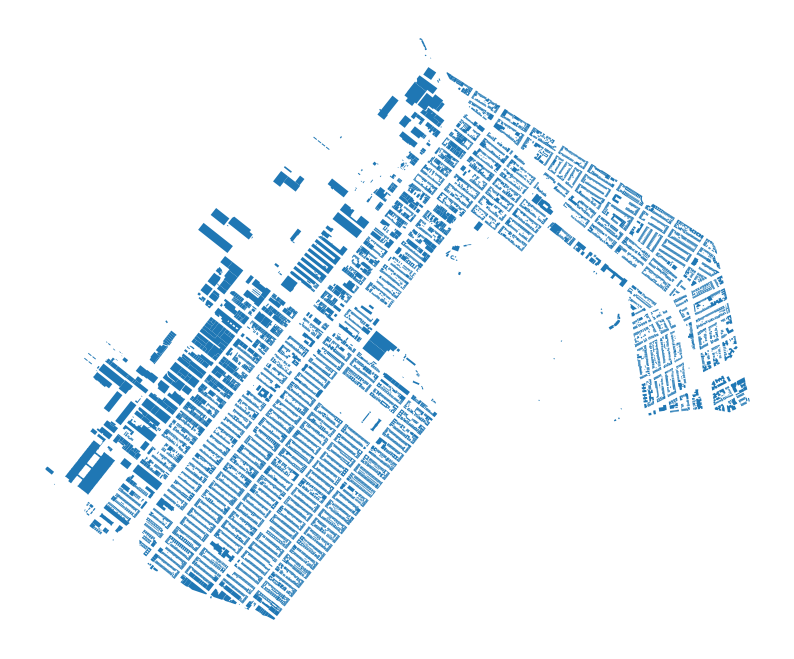

In [41]:
bldgs_w_lot_gdf.plot()

In [42]:
bldgs_w_lot_gdf

globalid mpluto_bbl_x  index_right  \
0      {C2B6150A-AA05-4865-B836-9DFA5C153E9C}   3008130054         6880   
1      {6290F624-6A8D-482F-8BD9-57C27337D89F}   3008370001         7179   
2      {F68D5818-C246-4828-A454-10D28962217D}   3007890064         7747   
3      {441DAB8C-3423-4722-ABDE-4BFE5A472C2B}   3052800064        12324   
4      {B8BC6B19-B2E4-4842-8B03-5C28CC13A572}   3011150070         1061   
...                                       ...          ...          ...   
14310  {D5768C56-DC0C-4488-900C-B2A3A6D16F0D}   3007280068         8156   
14311  {5621CB64-68C7-45BD-8999-B5A11F49E410}   3007280069         8155   
14312  {7B705FF4-ACD6-45CD-A2E0-C32B7F74C263}   3007280070         8154   
14313  {75A668C9-C3C1-4D26-A670-0BD6A433B4BB}   3007280071         8157   
14314  {A2C9A5C4-FDE4-4561-911C-635B8593DC2B}   3008290016         7160   

      Borough  Block  Lot   CD  BCT2020    BCTCB2020 CT2010  ...   lststatype  \
0          BK    813   54  307  3002000  30020002002     20  ...  Constructed   
1          BK    837    1  307  3002200  30022002000     22  ...  Constructed   
2          BK    789   64  307  3002000  30020001003     20  ...  Constructed   
3          BK   5280   64  307  3050001  30500011001    500  ...  Constructed   
4          BK   1115   70  307  3017100  30171002000    171  ...  Constructed   
...       ...    ...  ...  ...      ...          ...    ...  ...          ...   
14310      BK    728   68  307  3008200  30082002003     82  ...  Constructed   
14311      BK    728   69  307  3008200  30082002003     82  ...  Constructed   
14312      BK    728   70  307  3008200  30082002003     82  ...  Constructed   
14313      BK    728   71  307  3008200  30082002003     82  ...  Constructed   
14314      BK    829   16  307  3002200  30022001005     22  ...  Constructed   

      feat_code  groundelev  geomsource      bin  lstmoddate  doitt_id  \
0          2100          48  Photogramm  3014166  2017-08-22    392052   
1          2100          36  Photogramm  3341882  2017-08-22    721766   
2          2100          32  Photogramm  3013180  2017-08-22    729838   
3          2100          62  Photogramm  3122680  2017-08-22    427739   
4          2100         147  Photogramm  3027391  2017-08-22    752842   
...         ...         ...         ...      ...         ...       ...   
14310      2100          39  Photogramm  3424566  2024-05-06   1302012   
14311      2100          39  Photogramm  3424567  2024-05-06   1302013   
14312      2100          39  Photogramm  3424568  2024-05-06   1302014   
14313      2100          39  Photogramm  3424569  2024-05-06   1302015   
14314      2100          41  Other (Man  3428542  2024-05-06   1300421   

       shape_len                                           geometry  \
0            0.0  MULTIPOLYGON (((979424.884 174653.762, 979393....   
1            0.0  MULTIPOLYGON (((978615.393 174418.816, 978592....   
2            0.0  MULTIPOLYGON (((979722.511 175458.427, 979700....   
3            0.0  MULTIPOLYGON (((989834.116 175442.434, 989851....   
4            0.0  MULTIPOLYGON (((990301.65 178978.578, 990273.0...   
...          ...                                                ...   
14310        0.0  MULTIPOLYGON (((981317.242 176443.542, 981304....   
14311        0.0  MULTIPOLYGON (((981329.669 176459.233, 981317....   
14312        0.0  MULTIPOLYGON (((981341.775 176474.519, 981329....   
14313        0.0  MULTIPOLYGON (((981352.745 176488.37, 981341.7...   
14314        0.0  MULTIPOLYGON (((978919.968 174549.012, 978952....   

                              rep_pt  
0        POINT (979402.531 174638.9)  
1      POINT (978532.245 174359.877)  
2        POINT (979672.912 175444.4)  
3      POINT (989860.229 175412.619)  
4      POINT (990278.753 178961.422)  
...                              ...  
14310  POINT (981296.529 176447.127)  
14311   POINT (981309.04 176462.804)  
14312  POINT (981321.248 176478.339)  
14313  POINT (981333.527 176493

In [43]:
cmap = {
    "One & Two Family Buildings": "#ffff00",
    "Multi-Family Walk-Up Buildings": "#fffb00",
    "Multi-Family Elevator Buildings": "#ffc800",
    "Mixed Residential & Commercial Buildings": "#ff4000",
    "Commercial & Office Buildings": "#ff0000",
    "Industrial & Manufacturing": "#7700ff",
    "Transportation & Utility": "#808080",
    "Public Facilities & Institutions": "#001580",
    "Open Space & Outdoor Recreation": "#219F21",
    "Parking Facilities": "#A6A6AB",
    "Vacant Land": "#222222",
    "Unknown": "#000000",
}

In [44]:
cmap_rgb = {k: list(int(v[i : i + 2], 16) for i in (1, 3, 5)) for k, v in cmap.items()}

In [45]:
cmap_rgb

{'One & Two Family Buildings': [255, 255, 0],
 'Multi-Family Walk-Up Buildings': [255, 251, 0],
 'Multi-Family Elevator Buildings': [255, 200, 0],
 'Mixed Residential & Commercial Buildings': [255, 64, 0],
 'Commercial & Office Buildings': [255, 0, 0],
 'Industrial & Manufacturing': [119, 0, 255],
 'Transportation & Utility': [128, 128, 128],
 'Public Facilities & Institutions': [0, 21, 128],
 'Open Space & Outdoor Recreation': [33, 159, 33],
 'Parking Facilities': [166, 166, 171],
 'Vacant Land': [34, 34, 34],
 'Unknown': [0, 0, 0]}

In [46]:
bldgs_w_lot_gdf.LandUse.unique()

array(['One & Two Family Buildings', 'Public Facilities & Institutions',
       'Industrial & Manufacturing',
       'Mixed Residential & Commercial Buildings',
       'Commercial & Office Buildings', 'Multi-Family Walk-Up Buildings',
       'Transportation & Utility', 'Parking Facilities', 'Unknown',
       'Multi-Family Elevator Buildings', 'Vacant Land',
       'Open Space & Outdoor Recreation'], dtype=object)

In [47]:
bldgs_w_lot_gdf["LandUse"].fillna("Unknown", inplace=True)

/var/folders/g5/b592wl6x12s0tx4jfw9f7_j40000gn/T/ipykernel_65121/1624109216.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bldgs_w_lot_gdf["LandUse"].fillna("Unknown", inplace=True)


In [48]:
bldgs_w_lot_gdf[["color", "LandUse"]]

color                                   LandUse
0      #ff0000                One & Two Family Buildings
1      #800000          Public Facilities & Institutions
2      #ffff00                Industrial & Manufacturing
3      #ff00ff  Mixed Residential & Commercial Buildings
4      #ff0000                One & Two Family Buildings
...        ...                                       ...
14310  #ff0000                One & Two Family Buildings
14311  #ff0000                One & Two Family Buildings
14312  #ff0000                One & Two Family Buildings
14313  #ff0000                One & Two Family Buildings
14314  #ff00ff  Mixed Residential & Commercial Buildings

[14315 rows x 2 columns]

In [49]:
cmap_rgb

{'One & Two Family Buildings': [255, 255, 0],
 'Multi-Family Walk-Up Buildings': [255, 251, 0],
 'Multi-Family Elevator Buildings': [255, 200, 0],
 'Mixed Residential & Commercial Buildings': [255, 64, 0],
 'Commercial & Office Buildings': [255, 0, 0],
 'Industrial & Manufacturing': [119, 0, 255],
 'Transportation & Utility': [128, 128, 128],
 'Public Facilities & Institutions': [0, 21, 128],
 'Open Space & Outdoor Recreation': [33, 159, 33],
 'Parking Facilities': [166, 166, 171],
 'Vacant Land': [34, 34, 34],
 'Unknown': [0, 0, 0]}

In [50]:
# make a lonboard plot with color based on land use and height based on number of floors
heights = bldgs_w_lot_gdf["heightroof"].astype(float).to_numpy()
bldgs_layer = PolygonLayer.from_geopandas(
    bldgs_w_lot_gdf[["geometry", "LandUse"]],
    get_fill_color=apply_categorical_cmap(bldgs_w_lot_gdf["LandUse"], cmap=cmap_rgb),
    extruded=True,
    get_elevation=heights,
)

m = Map(
    [bldgs_layer],
    view_state={
        "pitch": 45,
        "zoom": 14,
        "latitude": 40.6459406,
        "longitude": -74.0151512,
    },
)
m

/Users/marioag/opt/anaconda3/envs/cdp25/lib/python3.12/site-packages/lonboard/_geoarrow/ops/reproject.py:97: UserWarning: Input being reprojected to EPSG:4326 CRS
  warnings.warn("Input being reprojected to EPSG:4326 CRS")


Map(layers=[PolygonLayer(extruded=True, get_elevation=<pyarrow.lib.FloatArray object at 0x140dc3dc0>
[
  31.05…

## attribute join


... sometimes it makes more sense to join based on attributes rather than spatial relationships. This is one of those cases.


In [51]:
cb_307_bldgs.mpluto_bbl.nunique(), cb_307.shape

(26320, (13284, 97))

In [52]:
cb_307.columns

Index(['Borough', 'Block', 'Lot', 'CD', 'BCT2020', 'BCTCB2020', 'CT2010',
       'CB2010', 'SchoolDist', 'Council', 'ZipCode', 'FireComp', 'PolicePrct',
       'HealthCent', 'HealthArea', 'Sanitboro', 'SanitDistr', 'SanitSub',
       'Address', 'ZoneDist1', 'ZoneDist2', 'ZoneDist3', 'ZoneDist4',
       'Overlay1', 'Overlay2', 'SPDist1', 'SPDist2', 'SPDist3', 'LtdHeight',
       'SplitZone', 'BldgClass', 'LandUse', 'Easements', 'OwnerType',
       'OwnerName', 'LotArea', 'BldgArea', 'ComArea', 'ResArea', 'OfficeArea',
       'RetailArea', 'GarageArea', 'StrgeArea', 'FactryArea', 'OtherArea',
       'AreaSource', 'NumBldgs', 'NumFloors', 'UnitsRes', 'UnitsTotal',
       'LotFront', 'LotDepth', 'BldgFront', 'BldgDepth', 'Ext', 'ProxCode',
       'IrrLotCode', 'LotType', 'BsmtCode', 'AssessLand', 'AssessTot',
       'ExemptTot', 'YearBuilt', 'YearAlter1', 'YearAlter2', 'HistDist',
       'Landmark', 'BuiltFAR', 'ResidFAR', 'CommFAR', 'FacilFAR', 'BoroCode',
       'BBL', 'CondoNo', 'Tract2

In [53]:
cb_307_bldgs.mpluto_bbl.dtype, cb_307.BBL.dtype

(dtype('O'), dtype('float64'))

In [54]:
cb_307.BBL

0        3.053220e+09
1        3.053220e+09
2        3.053220e+09
3        3.053220e+09
4        3.053220e+09
             ...     
13279    3.057850e+09
13280    3.057940e+09
13281    3.057940e+09
13282    3.057940e+09
13283    3.057940e+09
Name: BBL, Length: 13284, dtype: float64

In [55]:
cb_307_bldgs.mpluto_bbl

0        3008130054
1        3010120038
2        3053130127
3        3058710090
4        3058850095
            ...    
30108    3007280070
30109    3007280071
30110    3056280026
30111    3008290016
30112    3055917507
Name: mpluto_bbl, Length: 30113, dtype: object

In [56]:
cb_307_bldgs["mpluto_bbl"] = cb_307_bldgs["mpluto_bbl"].astype(float)

In [57]:
cb_307_bldgs.mpluto_bbl

0        3.008130e+09
1        3.010120e+09
2        3.053130e+09
3        3.058710e+09
4        3.058850e+09
             ...     
30108    3.007280e+09
30109    3.007280e+09
30110    3.056280e+09
30111    3.008290e+09
30112    3.055918e+09
Name: mpluto_bbl, Length: 30113, dtype: float64

In [58]:
bldgs_w_lot_attrib = cb_307_bldgs.merge(
    cb_307, left_on="mpluto_bbl", right_on="BBL", how="inner"
)

In [59]:
bldgs_w_lot_attrib

name    base_bbl shape_area   heightroof    mpluto_bbl cnstrct_yr  \
0      None  3008130054        0.0        31.05  3.008130e+09       1901   
1      None  3008370001        0.0        64.47  3.008370e+09       1994   
2      None  3007890064        0.0        25.85  3.007890e+09       1931   
3      None  3052800064        0.0        23.66  3.052800e+09       1931   
4      None  3011150070        0.0        30.11  3.011150e+09       1901   
...     ...         ...        ...          ...           ...        ...   
14313  None  3007280068        0.0  32.32698744  3.007280e+09       2024   
14314  None  3007280069        0.0  32.32698744  3.007280e+09       2024   
14315  None  3007280070        0.0  32.32698744  3.007280e+09       2024   
14316  None  3007280071        0.0  32.32698744  3.007280e+09       2024   
14317  None  3008290016        0.0         50.0  3.008290e+09       2023   

                                     globalid   lststatype feat_code  \
0      {C2B6150A-AA05-4865-B836-9DFA5C153E9C}  Constructed      2100   
1      {6290F624-6A8D-482F-8BD9-57C27337D89F}  Constructed      2100   
2      {F68D5818-C246-4828-A454-10D28962217D}  Constructed      2100   
3      {441DAB8C-3423-4722-ABDE-4BFE5A472C2B}  Constructed      2100   
4      {B8BC6B19-B2E4-4842-8B03-5C28CC13A572}  Constructed      2100   
...                                       ...          ...       ...   
14313  {D5768C56-DC0C-4488-900C-B2A3A6D16F0D}  Constructed      2100   
14314  {5621CB64-68C7-45BD-8999-B5A11F49E410}  Constructed      2100   
14315  {7B705FF4-ACD6-45CD-A2E0-C32B7F74C263}  Constructed      2100   
14316  {75A668C9-C3C1-4D26-A670-0BD6A433B4BB}  Constructed      2100   
14317  {A2C9A5C4-FDE4-4561-911C-635B8593DC2B}  Constructed      2100   

      groundelev  ... Version DCPEdited   Latitude  Longitude Notes  \
0             48  ...  24v1.1      None  40.646041 -74.017448  None   
1             36  ...  24v1.1      None  40.645239 -74.020500  None   
2             32  ...  24v1.1      None  40.648210 -74.016515  None   
3             62  ...  24v1.1      None  40.648203 -73.979830  None   
4            147  ...  24v1.1      None  40.657928 -73.978234  None   
...          ...  ...     ...       ...        ...        ...   ...   
14313         39  ...  24v1.1      None  40.650969 -74.010638  None   
14314         39  ...  24v1.1      None  40.651013 -74.010592  None   
14315         39  ...  24v1.1      None  40.651054 -74.010548  None   
14316         39  ...  24v1.1      None  40.651100 -74.010502  None   
14317         41  ...  24v1.1      None  40.645648 -74.019232  None   

      Shape_Leng    Shape_Area NumFloorsCluster    color  \
0            0.0   1756.742220                0  #ff0000   
1            0.0  19141.495406                2  #800000   
2            0.0   6152.697688                0  #ffff00   
3            0.0   2138.490866                0  #ff00ff   
4            0.0   2055.187662                0  #ff0000   
...          ...           ...              ...      ...   
14313        0.0   1031.523292                3  #ff0000   
14314        0.0   1034.721967                3  #ff0000   
14315        0.0   1026.353733                3  #ff0000   
14316        0.0   1130.797708                3  #ff0000   
14317        0.0   4065.521634                2  #ff00ff   

                                              geometry_y  
0      MULTIPOLYGON (((979369.047 174612.71, 979433.9...  
1      MULTIPOLYGON (((978622.171 174415.821, 978651....  
2      MULTIPOLYGON (((979658.965 175378.734, 979612....  
3      MULTIPOLYGON (((989842.608 175466.797, 989842....  
4      MULTIPOLYGON (((990254.404 178941.971, 990307....  
...                                                  ...  
14313  MULTIPOLYGON (((981325.552 176434.363, 981313....  
14314  MULTIPOLYGON (((981337.818 176449.958, 981325....  
14315  MULTIPOLYGON (((981337.818 176449.958, 981297....  
14316  MULTIPOLYGON (((981350.077 176465.545, 981309....  
14317 

In [60]:
# assert bldgs_w_lot_attrib.shape == bldgs_w_lot_gdf.shape
bldgs_w_lot_attrib.shape == bldgs_w_lot_gdf.shape

False

<Axes: >

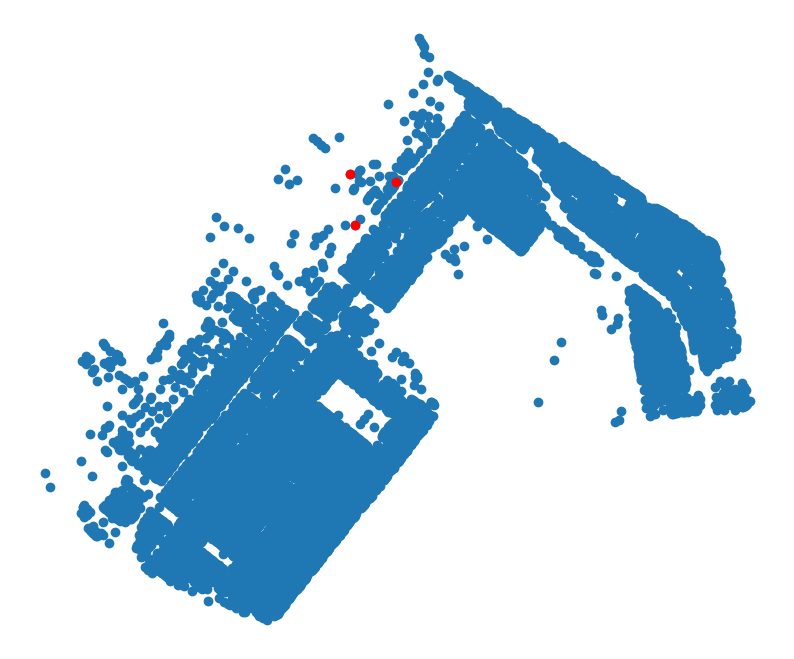

In [61]:
# find the globalid of the buildings in bldgs_w_lot_attrib that are not in bldgs_w_lot_gdf
ax = bldgs_w_lot_attrib.plot()
bldgs_w_lot_attrib[~bldgs_w_lot_attrib.globalid.isin(bldgs_w_lot_gdf.globalid)].plot(
    ax=ax, color="red"
)

table1: 14315

table2: 14318

In [62]:
bldgs_w_lot_gdf.globalid

0        {C2B6150A-AA05-4865-B836-9DFA5C153E9C}
1        {6290F624-6A8D-482F-8BD9-57C27337D89F}
2        {F68D5818-C246-4828-A454-10D28962217D}
3        {441DAB8C-3423-4722-ABDE-4BFE5A472C2B}
4        {B8BC6B19-B2E4-4842-8B03-5C28CC13A572}
                          ...                  
14310    {D5768C56-DC0C-4488-900C-B2A3A6D16F0D}
14311    {5621CB64-68C7-45BD-8999-B5A11F49E410}
14312    {7B705FF4-ACD6-45CD-A2E0-C32B7F74C263}
14313    {75A668C9-C3C1-4D26-A670-0BD6A433B4BB}
14314    {A2C9A5C4-FDE4-4561-911C-635B8593DC2B}
Name: globalid, Length: 14315, dtype: object

In [63]:
bldgs_w_lot_attrib[
    bldgs_w_lot_attrib.globalid.eq("{D5768C56-DC0C-4488-900C-B2A3A6D16F0D}")
]

name    base_bbl shape_area   heightroof    mpluto_bbl cnstrct_yr  \
14313  None  3007280068        0.0  32.32698744  3.007280e+09       2024   

                                     globalid   lststatype feat_code  \
14313  {D5768C56-DC0C-4488-900C-B2A3A6D16F0D}  Constructed      2100   

      groundelev  ... Version DCPEdited   Latitude  Longitude Notes  \
14313         39  ...  24v1.1      None  40.650969 -74.010638  None   

      Shape_Leng   Shape_Area NumFloorsCluster    color  \
14313        0.0  1031.523292                3  #ff0000   

                                              geometry_y  
14313  MULTIPOLYGON (((981325.552 176434.363, 981313....  

[1 rows x 114 columns]

In [64]:
missing_buildings = bldgs_w_lot_attrib[
    ~bldgs_w_lot_attrib.globalid.isin(bldgs_w_lot_gdf.globalid)
].globalid.unique()

In [65]:
len(missing_buildings)

3

In [66]:
bldgs_w_lot_attrib["geometry"] = bldgs_w_lot_attrib["geometry_x"]

In [67]:
bldgs_w_lot_attrib.set_geometry("geometry", inplace=True)

In [68]:
bldgs_w_lot_attrib  # .set_geometry("geometry", inplace=True)

name    base_bbl shape_area   heightroof    mpluto_bbl cnstrct_yr  \
0      None  3008130054        0.0        31.05  3.008130e+09       1901   
1      None  3008370001        0.0        64.47  3.008370e+09       1994   
2      None  3007890064        0.0        25.85  3.007890e+09       1931   
3      None  3052800064        0.0        23.66  3.052800e+09       1931   
4      None  3011150070        0.0        30.11  3.011150e+09       1901   
...     ...         ...        ...          ...           ...        ...   
14313  None  3007280068        0.0  32.32698744  3.007280e+09       2024   
14314  None  3007280069        0.0  32.32698744  3.007280e+09       2024   
14315  None  3007280070        0.0  32.32698744  3.007280e+09       2024   
14316  None  3007280071        0.0  32.32698744  3.007280e+09       2024   
14317  None  3008290016        0.0         50.0  3.008290e+09       2023   

                                     globalid   lststatype feat_code  \
0      {C2B6150A-AA05-4865-B836-9DFA5C153E9C}  Constructed      2100   
1      {6290F624-6A8D-482F-8BD9-57C27337D89F}  Constructed      2100   
2      {F68D5818-C246-4828-A454-10D28962217D}  Constructed      2100   
3      {441DAB8C-3423-4722-ABDE-4BFE5A472C2B}  Constructed      2100   
4      {B8BC6B19-B2E4-4842-8B03-5C28CC13A572}  Constructed      2100   
...                                       ...          ...       ...   
14313  {D5768C56-DC0C-4488-900C-B2A3A6D16F0D}  Constructed      2100   
14314  {5621CB64-68C7-45BD-8999-B5A11F49E410}  Constructed      2100   
14315  {7B705FF4-ACD6-45CD-A2E0-C32B7F74C263}  Constructed      2100   
14316  {75A668C9-C3C1-4D26-A670-0BD6A433B4BB}  Constructed      2100   
14317  {A2C9A5C4-FDE4-4561-911C-635B8593DC2B}  Constructed      2100   

      groundelev  ... DCPEdited   Latitude  Longitude Notes Shape_Leng  \
0             48  ...      None  40.646041 -74.017448  None        0.0   
1             36  ...      None  40.645239 -74.020500  None        0.0   
2             32  ...      None  40.648210 -74.016515  None        0.0   
3             62  ...      None  40.648203 -73.979830  None        0.0   
4            147  ...      None  40.657928 -73.978234  None        0.0   
...          ...  ...       ...        ...        ...   ...        ...   
14313         39  ...      None  40.650969 -74.010638  None        0.0   
14314         39  ...      None  40.651013 -74.010592  None        0.0   
14315         39  ...      None  40.651054 -74.010548  None        0.0   
14316         39  ...      None  40.651100 -74.010502  None        0.0   
14317         41  ...      None  40.645648 -74.019232  None        0.0   

         Shape_Area NumFloorsCluster    color  \
0       1756.742220                0  #ff0000   
1      19141.495406                2  #800000   
2       6152.697688                0  #ffff00   
3       2138.490866                0  #ff00ff   
4       2055.187662                0  #ff0000   
...             ...              ...      ...   
14313   1031.523292                3  #ff0000   
14314   1034.721967                3  #ff0000   
14315   1026.353733                3  #ff0000   
14316   1130.797708                3  #ff0000   
14317   4065.521634                2  #ff00ff   

                                              geometry_y  \
0      MULTIPOLYGON (((979369.047 174612.71, 979433.9...   
1      MULTIPOLYGON (((978622.171 174415.821, 978651....   
2      MULTIPOLYGON (((979658.965 175378.734, 979612....   
3      MULTIPOLYGON (((989842.608 175466.797, 989842....   
4      MULTIPOLYGON (((990254.404 178941.971, 990307....   
...                                                  ...   
14313  MULTIPOLYGON (((981325.552 176434.363, 981313....   
14314  MULTIPOLYGON (((981337.818 176449.958, 981325....   
14315  MULTIPOLYGON (((981337.818 176449.958, 981297....   
14316  MULTIPOLYGON (((981350.077 176465.545, 981309....   
14317  MULTIPOLYGON (((978960.912 174531.714, 978897....   

                              

### investigate- what's going on??


In [69]:
# make a lonboard plot with color based on land use and height based on number of floors

missing_bldgs = bldgs_w_lot_attrib[bldgs_w_lot_attrib.globalid.isin(missing_buildings)]

heights_missing = missing_bldgs["heightroof"].astype(float).to_numpy()

lots_layer = PolygonLayer.from_geopandas(
    cb_307[["geometry", "LandUse"]],
    get_fill_color=apply_categorical_cmap(cb_307["LandUse"], cmap=cmap_rgb),
)

missing_bldgs_layer = PolygonLayer.from_geopandas(
    missing_bldgs[["geometry", "LandUse"]],
    get_fill_color=[255, 0, 0, 155],
    extruded=True,
    get_elevation=heights_missing,
)

m = Map(
    [missing_bldgs_layer, lots_layer],
    view_state={
        "pitch": 45,
        "zoom": 14,
        "latitude": 40.6459406,
        "longitude": -74.0151512,
    },
)
m

/Users/marioag/opt/anaconda3/envs/cdp25/lib/python3.12/site-packages/lonboard/_geoarrow/ops/reproject.py:97: UserWarning: Input being reprojected to EPSG:4326 CRS
  warnings.warn("Input being reprojected to EPSG:4326 CRS")
/Users/marioag/opt/anaconda3/envs/cdp25/lib/python3.12/site-packages/lonboard/_geoarrow/ops/reproject.py:97: UserWarning: Input being reprojected to EPSG:4326 CRS
  warnings.warn("Input being reprojected to EPSG:4326 CRS")


Map(layers=[PolygonLayer(extruded=True, get_elevation=<pyarrow.lib.FloatArray object at 0x148f3d480>
[
  14.24…

So we can see that there are three cases where buildings are associated with lots, even if their representative point (or entire geometry) fall outside of the actual polygon.


## dissolve


Learn more about dissolve here: https://geopandas.org/en/stable/docs/user_guide/aggregation_with_dissolve.html


In [70]:
cb_307_by_owner = cb_307.dissolve(
    by="OwnerName",
    aggfunc={
        "LandUse": list,
        "LotArea": "sum",
    },
).reset_index()

In [71]:
cb_307_by_owner

OwnerName  \
0           *** NO OWNER FOUND ***   
1      1-10 BUSH TERMINAL OWNER LP   
2              10 E 4TH STREET LLC   
3             10-16 OCEAN REALTIES   
4                  100 19TH STREET   
...                            ...   
12136               ZWERLING, CARA   
12137              ZWICK, ELAINE R   
12138               ZWL REALTY LLC   
12139            ZY MANAGEMENT LLC   
12140          ZYT MANAGEMENT INC.   

                                                geometry  \
0      POLYGON ((980590.724 174235.587, 980527.813 17...   
1      POLYGON ((982202.987 178074.791, 982200.638 17...   
2      POLYGON ((990181.201 176930.755, 990282.152 17...   
3      POLYGON ((991792.749 176633.932, 991787.15 176...   
4      POLYGON ((989711.736 177970.244, 989649.158 17...   
...                                                  ...   
12136  POLYGON ((990576.588 178737.293, 990630.331 17...   
12137  POLYGON ((990085.407 178976.26, 990103.152 178...   
12138  POLYGON ((983015.618 174308.387, 982951.592 17...   
12139  POLYGON ((981487.36 171696.522, 981474.555 171...   
12140  POLYGON ((980899.844 177312.031, 980912.602 17...   

                                                 LandUse  LotArea  
0                           [One & Two Family Buildings]     2003  
1      [Commercial & Office Buildings, Industrial & M...   722097  
2                       [Multi-Family Walk-Up Buildings]     2050  
3                      [Multi-Family Elevator Buildings]    42968  
4                       [Multi-Family Walk-Up Buildings]     6010  
...                                                  ...      ...  
12136                       [One & Two Family Buildings]     2000  
12137                   [Multi-Family Walk-Up Buildings]     2000  
12138                   [Multi-Family Walk-Up Buildings]     2003  
12139         [Mixed Residential & Commercial Buildings]     2017  
12140         [Mixed Residential & Commercial Buildings]     1669  

[12141 rows x 4 columns]

In [72]:
cb_307_by_owner.sort_values("LotArea", ascending=False).head(10)

OwnerName  \
5133                                  GREENWOOD CEMETRY   
8473          NYC DEPARTMENT OF SMALL BUSINESS SERVICES   
10900                                 UNAVAILABLE OWNER   
8471             NYC DEPARTMENT OF PARKS AND RECREATION   
2140   ASTORIA GENERATING COMPANY ACQUISITIONS,  L.L.C.   
1                           1-10 BUSH TERMINAL OWNER LP   
8468                        NYC DEPARTMENT OF EDUCATION   
10051                         SIP HOLDINGS VENTURE, LLC   
2141                   ASTORIA GENERATING COMPANY, L.P.   
214                        19-20 BUSH TERMINAL OWNER LP   

                                                geometry  \
5133   POLYGON ((984765.258 175999.082, 984925.008 17...   
8473   MULTIPOLYGON (((977030.251 172629.699, 976946....   
10900  MULTIPOLYGON (((981243.984 170905.64, 981282.8...   
8471   MULTIPOLYGON (((978465.658 171814.4, 978466.30...   
2140   MULTIPOLYGON (((978444.216 175678.927, 978168....   
1      POLYGON ((982202.987 178074.791, 982200.638 17...   
8468   MULTIPOLYGON (((978862.322 173019.035, 978673....   
10051  POLYGON ((984386.571 181329.041, 984380.016 18...   
2141   POLYGON ((983947.513 180523.148, 983958.019 18...   
214    POLYGON ((981122.148 177799.108, 980997.043 17...   

                                                 LandUse   LotArea  
5133                   [Open Space & Outdoor Recreation]  20309060  
8473   [Industrial & Manufacturing, Transportation & ...  14330563  
10900  [Multi-Family Elevator Buildings, Multi-Family...   2145841  
8471   [Open Space & Outdoor Recreation, Open Space &...   1779509  
2140   [Transportation & Utility, Transportation & Ut...   1493713  
1      [Commercial & Office Buildings, Industrial & M...    722097  
8468   [Public Facilities & Institutions, Public Faci...    717864  
10051  [Commercial & Office Buildings, Industrial & M...    528901  
2141                          [Transportation & Utility]    515406  
214    [Industrial & Manufacturing, Parking Facilitie...    507505

Text(0.5, 1.0, 'Top 10 Owners by Lot Area')

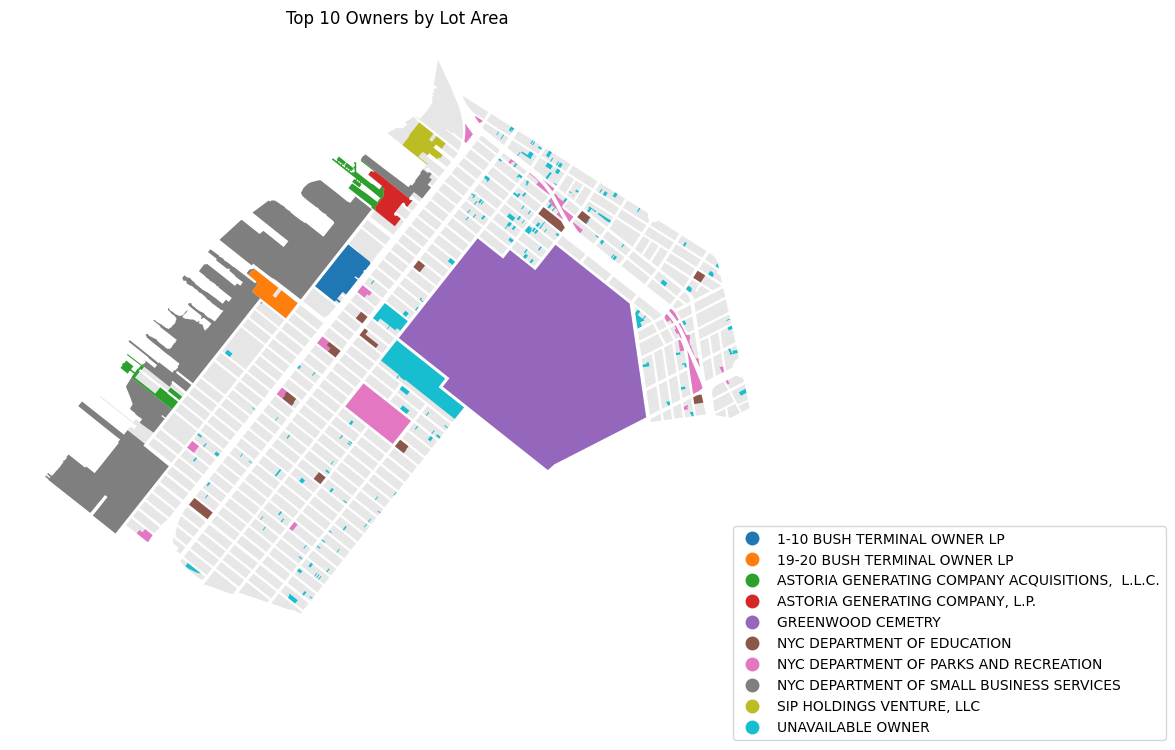

In [ ]:
fig, ax = plt.subplots()
cb_307.plot(color="#cecece", ax=ax, alpha=0.5)

cb_307_by_owner.sort_values("LotArea", ascending=False).head(10).plot(
    column="OwnerName", legend=True, ax=ax
).


# get legend item
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.0, 0.0, 0.5, 0.2))
ax.set_title("Top 10 Owners by Lot Area")
# put legend off the plot
# cb_307_by_owner.plot(column="OwnerName", legend=False)

In [74]:
cb_307_by_owner

OwnerName  \
0           *** NO OWNER FOUND ***   
1      1-10 BUSH TERMINAL OWNER LP   
2              10 E 4TH STREET LLC   
3             10-16 OCEAN REALTIES   
4                  100 19TH STREET   
...                            ...   
12136               ZWERLING, CARA   
12137              ZWICK, ELAINE R   
12138               ZWL REALTY LLC   
12139            ZY MANAGEMENT LLC   
12140          ZYT MANAGEMENT INC.   

                                                geometry  \
0      POLYGON ((980590.724 174235.587, 980527.813 17...   
1      POLYGON ((982202.987 178074.791, 982200.638 17...   
2      POLYGON ((990181.201 176930.755, 990282.152 17...   
3      POLYGON ((991792.749 176633.932, 991787.15 176...   
4      POLYGON ((989711.736 177970.244, 989649.158 17...   
...                                                  ...   
12136  POLYGON ((990576.588 178737.293, 990630.331 17...   
12137  POLYGON ((990085.407 178976.26, 990103.152 178...   
12138  POLYGON ((983015.618 174308.387, 982951.592 17...   
12139  POLYGON ((981487.36 171696.522, 981474.555 171...   
12140  POLYGON ((980899.844 177312.031, 980912.602 17...   

                                                 LandUse  LotArea  
0                           [One & Two Family Buildings]     2003  
1      [Commercial & Office Buildings, Industrial & M...   722097  
2                       [Multi-Family Walk-Up Buildings]     2050  
3                      [Multi-Family Elevator Buildings]    42968  
4                       [Multi-Family Walk-Up Buildings]     6010  
...                                                  ...      ...  
12136                       [One & Two Family Buildings]     2000  
12137                   [Multi-Family Walk-Up Buildings]     2000  
12138                   [Multi-Family Walk-Up Buildings]     2003  
12139         [Mixed Residential & Commercial Buildings]     2017  
12140         [Mixed Residential & Commercial Buildings]     1669  

[12141 rows x 4 columns]

## Intersect / Difference


In [75]:
sample_block = cb_307.Block.sample(1).values[0]

In [76]:
sample_block

np.int64(847)

In [77]:
cb_307_bldgs.columns

Index(['name', 'base_bbl', 'shape_area', 'heightroof', 'mpluto_bbl',
       'cnstrct_yr', 'globalid', 'lststatype', 'feat_code', 'groundelev',
       'geomsource', 'bin', 'lstmoddate', 'doitt_id', 'shape_len', 'geometry',
       'rep_pt'],
      dtype='object')

In [78]:
sample_block_lots = cb_307[cb_307.Block.eq(sample_block)].copy()
sample_block_bldgs = cb_307_bldgs[
    cb_307_bldgs.mpluto_bbl.isin(sample_block_lots.BBL.unique())
].copy()

In [79]:
sample_block_bldgs.set_geometry("geometry", inplace=True)

Text(0.5, 1.0, 'Block 847')

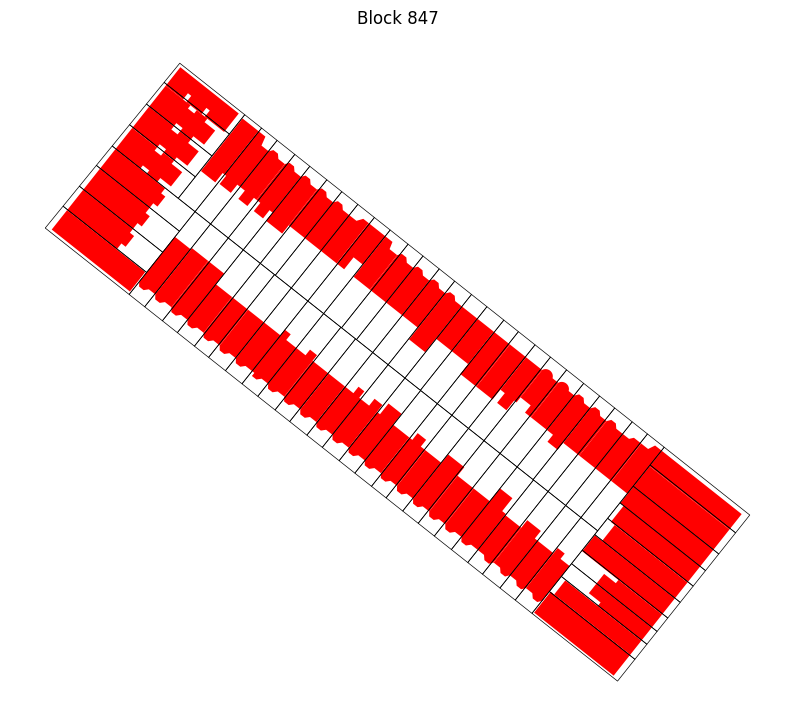

In [ ]:
ax = sample_block_lots.boundary.plot(color="black", linewidth=0.5)
sample_block_bldgs.plot(ax=ax, color="red")

ax.set_title(f"Block {sample_block}")

In [81]:
sample_block_non_bldg = sample_block_lots.difference(sample_block_bldgs.unary_union)

/var/folders/g5/b592wl6x12s0tx4jfw9f7_j40000gn/T/ipykernel_65121/3284385118.py:1: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  sample_block_non_bldg = sample_block_lots.difference(sample_block_bldgs.unary_union)


In [82]:
sample_block_non_bldg.shape

(69,)

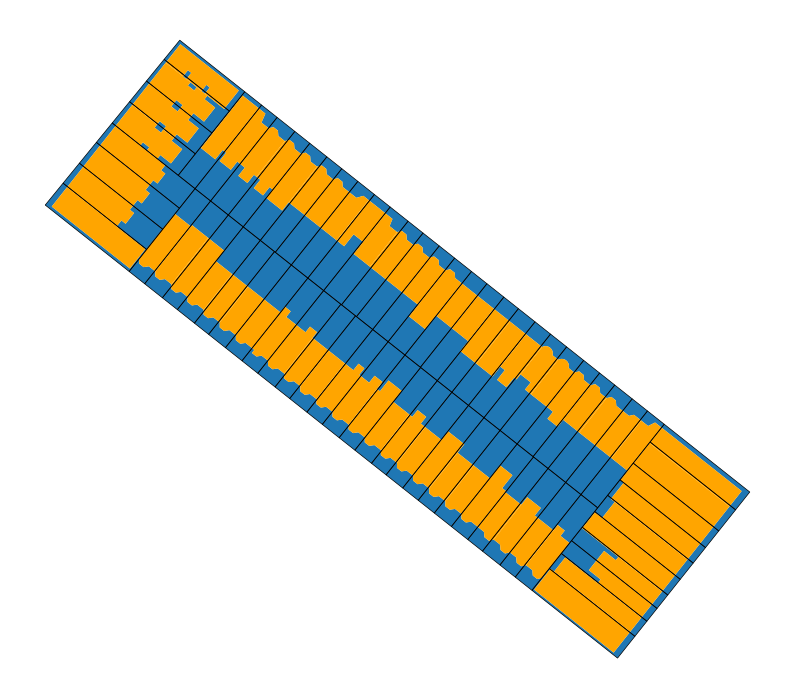

In [ ]:
ax = sample_block_lots.boundary.plot(color="black", linewidth=0.5)
sample_block_non_bldg.plot(ax=ax)
sample_block_bldgs.plot(ax=ax, color="orange")

In [84]:
sample_block_non_bldg_intersect = sample_block_lots.intersection(
    sample_block_bldgs.unary_union
)

/var/folders/g5/b592wl6x12s0tx4jfw9f7_j40000gn/T/ipykernel_65121/2781225839.py:2: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  sample_block_bldgs.unary_union


In [85]:
sample_block_non_bldg_intersect.shape

(69,)

<Axes: >

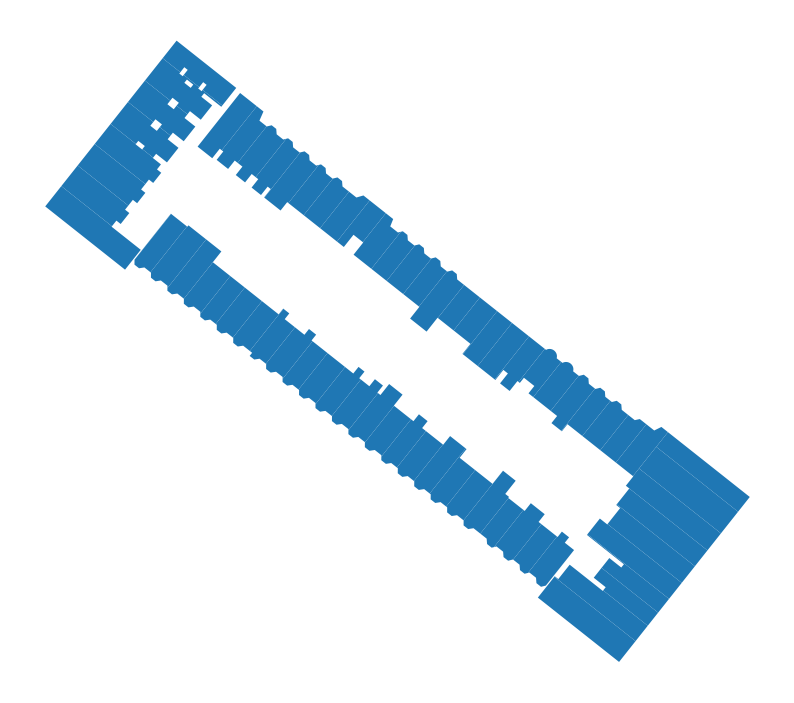

In [86]:
sample_block_non_bldg_intersect.plot()

## Union


In [87]:
sample_block_lots.shape

(69, 97)

In [88]:
sample_block_lots["lot_area"] = sample_block_lots.area

In [89]:
lots_bldgs_union = gpd.overlay(sample_block_lots, sample_block_bldgs, how="union")

In [90]:
lots_bldgs_union.shape

(240, 114)

In [91]:
import pandas as pd

In [92]:
lots_bldgs_union

Borough  Block   Lot     CD  BCT2020    BCTCB2020 CT2010 CB2010  \
0        BK  847.0  38.0  307.0  3007400  30074001001     74   1001   
1        BK  847.0  38.0  307.0  3007400  30074001001     74   1001   
2        BK  847.0  38.0  307.0  3007400  30074001001     74   1001   
3        BK  847.0  37.0  307.0  3007400  30074001001     74   1001   
4        BK  847.0  37.0  307.0  3007400  30074001001     74   1001   
..      ...    ...   ...    ...      ...          ...    ...    ...   
235     NaN    NaN   NaN    NaN      NaN          NaN    NaN    NaN   
236     NaN    NaN   NaN    NaN      NaN          NaN    NaN    NaN   
237     NaN    NaN   NaN    NaN      NaN          NaN    NaN    NaN   
238     NaN    NaN   NaN    NaN      NaN          NaN    NaN    NaN   
239     NaN    NaN   NaN    NaN      NaN          NaN    NaN    NaN   

    SchoolDist  Council  ...   lststatype feat_code  groundelev  geomsource  \
0           20     38.0  ...  Constructed      2100         116  Photogramm   
1           20     38.0  ...  Constructed      2100         116  Photogramm   
2           20     38.0  ...  Constructed      2100         113  Photogramm   
3           20     38.0  ...  Constructed      2100         116  Photogramm   
4           20     38.0  ...  Constructed      2100         113  Photogramm   
..         ...      ...  ...          ...       ...         ...         ...   
235        NaN      NaN  ...  Constructed      2100         101  Photogramm   
236        NaN      NaN  ...  Constructed      2100         113  Photogramm   
237        NaN      NaN  ...  Constructed      2100         102  Photogramm   
238        NaN      NaN  ...  Constructed      2100         106  Photogramm   
239        NaN      NaN  ...  Constructed      2100         115  Photogramm   

         bin lstmoddate doitt_id shape_len                         rep_pt  \
0    3015682 2017-08-22   747284       0.0  POINT (980150.392 172880.716)   
1    3015681 2017-08-22   322768       0.0  POINT (980167.712 172895.325)   
2    3015680 2020-01-28   114066       0.0    POINT (980096.69 172918.71)   
3    3015681 2017-08-22   322768       0.0  POINT (980167.712 172895.325)   
4    3015680 2020-01-28   114066       0.0    POINT (980096.69 172918.71)   
..       ...        ...      ...       ...                            ...   
235  3015665 2020-01-28   377870       0.0  POINT (979863.416 173107.698)   
236  3015679 2020-01-28   819268       0.0  POINT (980084.201 172935.174)   
237  3015704 2020-01-28   318315       0.0   POINT (979780.594 173004.19)   
238  3015699 2020-01-28   167989       0.0  POINT (979859.025 172942.043)   
239  3015714 2017-08-22   125678       0.0  POINT (980080.789 172829.944)   

                                              geometry  
0    POLYGON ((980099.027 172905.546, 980114.588 17...  
1    POLYGON ((980193.117 172864.513, 980192.361 17...  
2    POLYGON ((980115.129 172926.401, 980115.389 17...  
3    POLYGON ((980115.389 172926.195, 980126.499 17...  
4    POLYGON ((980115.129 172926.401, 980126.272 17...  
..                                                 ...  
235  POLYGON ((979843.549 173096.105, 979862.859 17...  
236  POLYGON ((980076.628 172911.417, 980104.238 17...  
237  POLYGON ((979758.941 172991.13, 979772.807 173...  
238  POLYGON ((979837.39 172930.573, 979837.39 1729...  
239  POLYGON ((980049.53 172843.08, 980049.53 17284...  

[240 rows x 114 columns]

<Axes: >

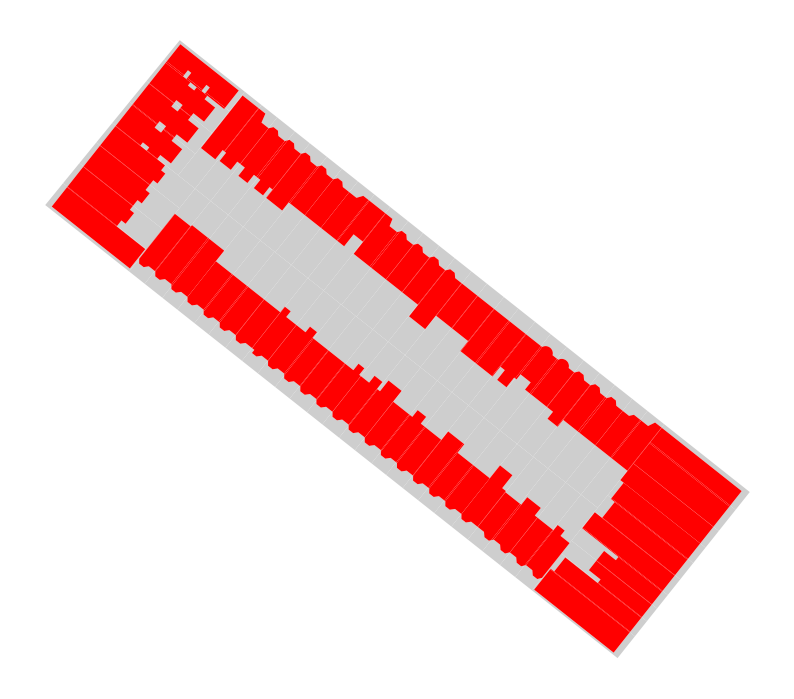

In [93]:
ax = lots_bldgs_union[lots_bldgs_union.globalid.isna()].plot(color="#cecece")
lots_bldgs_union[lots_bldgs_union.globalid.notna()].plot(ax=ax, color="red")

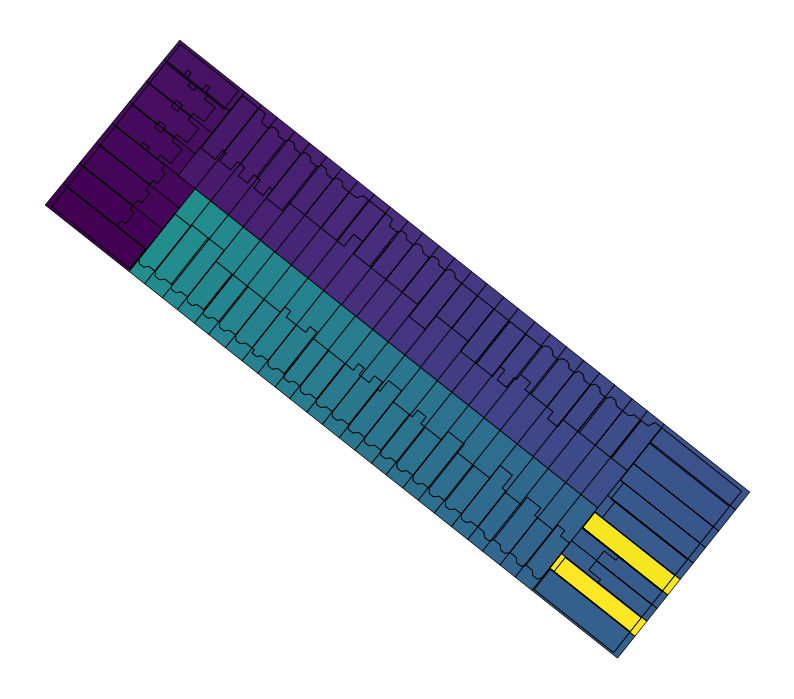

In [ ]:
ax = lots_bldgs_union[lots_bldgs_union.globalid.isna()].plot("Lot")
lots_bldgs_union[lots_bldgs_union.globalid.notna()].plot("Lot", ax=ax)
lots_bldgs_union.boundary.plot(color="black", ax=ax, linewidth=0.5)

In [95]:
lots_bldgs_union.globalid.unique()

array(['{E77F4140-78AB-41DA-93C8-8A4F8F42C81D}',
       '{B5C6EBEA-DC19-4216-BF5D-248936197D0A}',
       '{8D1145C9-B9DF-4F44-ABE3-4A15569CAEA0}',
       '{C934776D-3815-4674-B1F2-858CC0571C5B}',
       '{9666C670-9BA5-498C-8C97-9D88D9070EDD}',
       '{059FECBE-84C9-4C90-AC53-D4A9881EA77B}',
       '{778CAC41-A05C-46C4-AFD6-EC73F18B0E29}',
       '{AB525E3A-F3E3-421C-9EC3-AEA6CDF8844A}',
       '{3632A994-ACA0-464B-B07E-BF503080EC5F}',
       '{9682E8CC-AB62-4AEF-AD3E-3D022B61ED03}',
       '{EA2A58EC-4830-4CA3-AB28-2409A1655EF0}',
       '{29D445A1-472C-486C-99F6-345268C31234}',
       '{50956B31-7EC9-4C21-BB9E-8BF3E5CA3BAC}',
       '{57CC4211-4CB8-421A-8DED-6B3903A2AEA0}',
       '{D011B153-388F-45DF-A914-E0DD75747B60}',
       '{ECF67599-2DBC-428E-96BC-0634914989CA}',
       '{AA4025D9-B093-4055-8F7B-3BFED89790B8}',
       '{F1D24B5A-2970-4DD3-97F3-BEAB4AA9DF3B}',
       '{C5F102E9-D076-40F3-9F18-79FC0889E3FB}',
       '{F8B2F01E-DDEE-4E90-948E-3AC45B43B399}',
       '{C0169C7A-AF

In [96]:
lots_bldgs_union["pct_bldg_lot_coverage"] = lots_bldgs_union.apply(
    lambda x: ((x.geometry.area / x.lot_area) * 100 if type(x.globalid) == str else -1),
    axis=1,
)

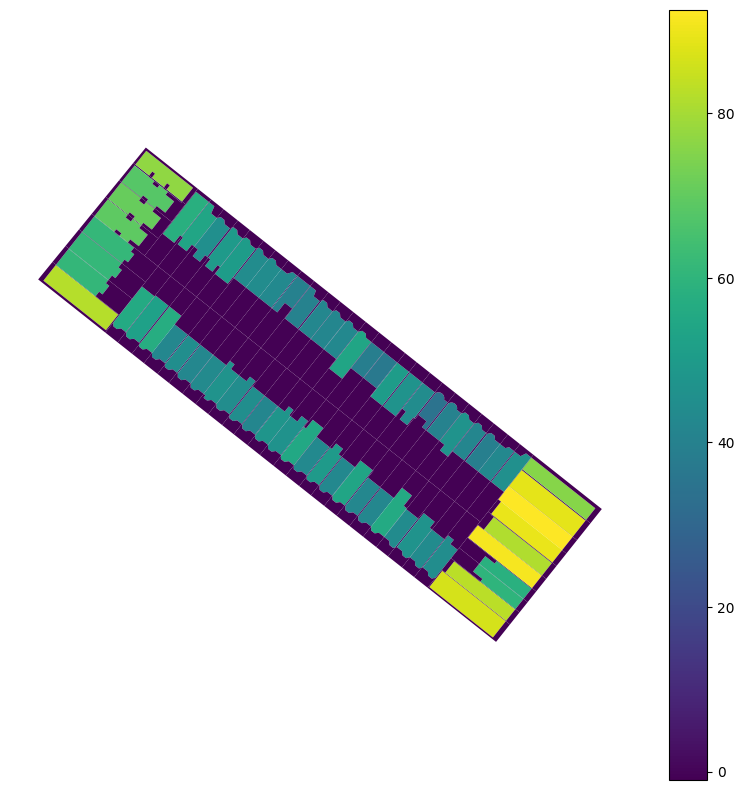

In [ ]:
lots_bldgs_union.plot("pct_bldg_lot_coverage", legend=True).

## calculate soft sites (create new attributes)


In [98]:
def is_soft_site(r, threshold=0.33):
    if (
        r.BuiltFAR <= r.ResidFAR * threshold
        and r.LotArea > 10000
        and r.LandUse != "Open Space & Outdoor Recreation"
        and r.ResidFAR > 0
    ):
        return 1
    else:
        return 0

In [99]:
cb_307["soft_site"] = cb_307.apply(is_soft_site, axis=1)

Now let's check how many soft sites we have in the neighborhood based on the criteria we defined above. Because we use 1/0 values to distinguish soft sites from not, we can use the `value_counts()` method to get a quick overview of the number of soft sites in the neighborhood.

In [100]:
cb_307["soft_site"].value_counts()

soft_site
0    13251
1       33
Name: count, dtype: int64

Text(0.5, 1.0, 'Soft Sites in Community Board 307')

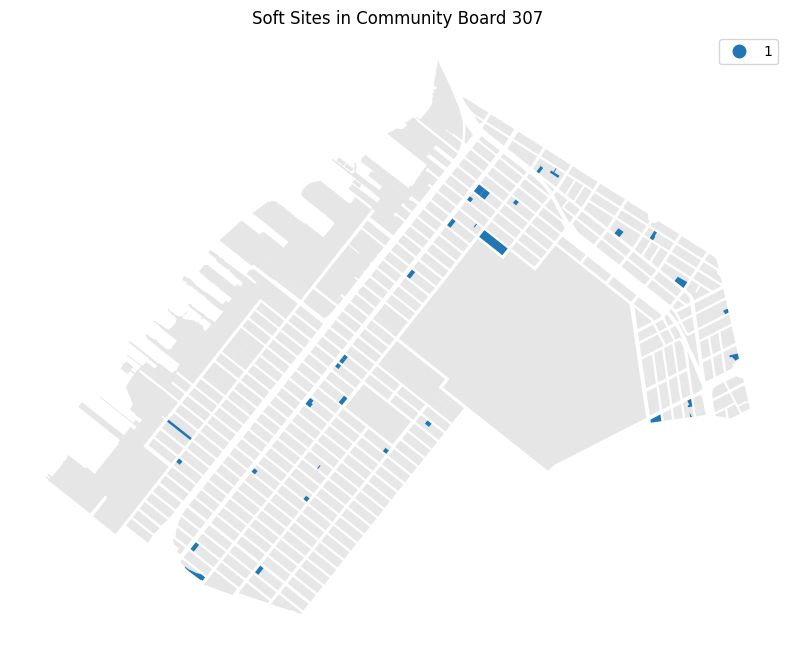

In [ ]:
ax = cb_307.plot(color="#cecece", alpha=0.5)
cb_307[cb_307.soft_site > 0].plot(
    "soft_site", ax=ax, legend=True, categorical=True
).
plt.title("Soft Sites in Community Board 307")

In [102]:
cb_307[cb_307.soft_site.eq(1)][["soft_site", "BuiltFAR", "ResidFAR"]]

soft_site  BuiltFAR  ResidFAR
116            1      0.05      1.25
125            1      0.69      2.43
529            1      0.18      4.00
538            1      0.59      3.00
796            1      0.41      1.35
1642           1      0.97      6.02
1656           1      0.09      2.00
1696           1      0.00      6.02
1738           1      0.40      2.00
1905           1      0.32      2.00
2383           1      0.54      2.00
2445           1      0.00      2.00
3370           1      0.18      1.35
3456           1      0.00      1.35
4234           1      0.00      2.00
4592           1      0.13      4.00
4992           1      0.00      6.02
5642           1      0.00      2.00
5740           1      0.60      4.00
6046           1      0.59      3.00
6665           1      0.98      4.00
7199           1      0.02      3.00
7669           1      0.00      2.43
8386           1      0.19      4.00
8514           1      0.65      4.00
8515           1      0.22      4.00
8615           1      0.90      3.00
8986           1      0.72      4.00
9443           1      0.38      2.00
9985           1      0.50      3.00
11044          1      0.44      4.00
11676          1      0.54      4.00
12317          1      0.14      1.25

In [103]:
soft_sites["ResidFAR"]

NameError: name 'soft_sites' is not defined

In [ ]:
# map soft sites
soft_sites = cb_307[cb_307.soft_site.eq(1)].copy()
soft_sites["ResidFAR"]

lots_layer = PolygonLayer.from_geopandas(
    soft_sites[["geometry", "ResidFAR"]],
    extruded=True,
    get_elevation=soft_sites["ResidFAR"] * 15,  # scale elevation for visibility
    pickable=True,
)

base_layer = PolygonLayer.from_geopandas(
    cb_307[["geometry", "LandUse"]],
    get_fill_color=[200, 200, 200, 155],
)

m = Map(
    [base_layer, lots_layer],
    view_state={
        "pitch": 45,
        "zoom": 14,
        "latitude": 40.6459406,
        "longitude": -74.0151512,
    },
)
m

/Users/marioag/opt/anaconda3/envs/cdp25/lib/python3.12/site-packages/lonboard/_geoarrow/ops/reproject.py:97: UserWarning: Input being reprojected to EPSG:4326 CRS
  warnings.warn("Input being reprojected to EPSG:4326 CRS")
/Users/marioag/opt/anaconda3/envs/cdp25/lib/python3.12/site-packages/lonboard/_geoarrow/ops/reproject.py:97: UserWarning: Input being reprojected to EPSG:4326 CRS
  warnings.warn("Input being reprojected to EPSG:4326 CRS")


Map(layers=[PolygonLayer(get_fill_color=[200, 200, 200, 155], table=pyarrow.Table
LandUse: string
geometry: li…